# Project:

> Complete the project in a single notebook called project.ipynb in your repository. The same style should be used as detailed above: explanations in MarkDown and code comments, clean code, and regular commits. Use plots as appropriate.

> In this project, you will analyze the PlantGrowth R dataset. You will find a short description of it on Vicent Arel-Bundock's Rdatasets page. The dataset contains two main variables, a treatment group and the weight of plants within those groups.

> Your task is to perform t-tests and ANOVA on this dataset while describing the dataset and explaining your work. In doing this you should:

>> Download and save the dataset to your repository.

>> Describe the data set in your notebook.

>> Describe what a t-test is, how it works, and what the assumptions are.

>> Perform a t-test to determine whether there is a significant difference between the two treatment groups trt1 and trt2.

>> Perform ANOVA to determine whether there is a significant difference between the three treatment groups ctrl, trt1, and trt2.

>> Explain why it is more appropriate to apply ANOVA rather than several t-tests when analyzing more than two groups.

## Introduction:

>The Plangrowth Dataset is an experiment that contains the weight of 30 plants sepparated in three groups:  
- The control group (ctrl) represents plants grown without any additional treatment.
- The experimental groups (trt1 and trt2) receive different treatments, and their plant weights are compared against the control group to assess the impact of the treatments.

>Download the Plant Growth dataset and save as csv file:   
>Link: https://github.com/vincentarelbundock/Rdatasets/blob/master/csv/datasets/PlantGrowth.csv

In [277]:
# Import Pandas 
import pandas as pd

# Import Matplotlib
import matplotlib.pyplot as plt

# Import Seaborn for plotting and data visualization
import seaborn as sns

# Statistical fucntions
import scipy.stats as stats

# Mathematical functions
import math

# To perform one-way ANOVA test
from scipy.stats import f_oneway



In [278]:
# Extract the data from the column "Wheight" and create three columns based on the group types
# Link: https://stackoverflow.com/questions/16503560/read-specific-columns-from-a-csv-file-with-csv-module 

# No header
# Link: https://stackoverflow.com/questions/29287224/pandas-read-in-table-without-headers
data = pd.read_csv('PlantGrowth.csv', header=None)

# Separate table in three groups ctrl, trt1, trt2
# Link: https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html
ctrl = data.iloc[1:11, 1:2] 
trt1 = data.iloc[11:21, 1:2]
trt2 = data.iloc[21:31, 1:2]


<AxesSubplot:>

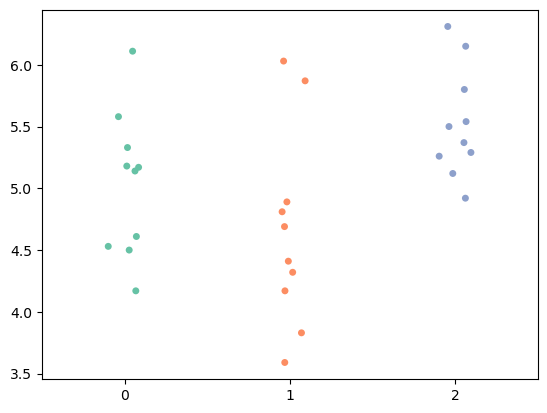

In [279]:
# Create a strip plot for a better view 
# Link: https://seaborn.pydata.org/generated/seaborn.color_palette.html  
#       https://seaborn.pydata.org/generated/seaborn.stripplot.html 

sns.stripplot(data = [ctrl,trt1,trt2], palette =('Set2'))

> In the corresponding plot, we observe the following trends:

>> Control group: The plant weights range between $4.2$ and $6.2$.  
>>Treatment group 1: This group shows some lower weights ranging from $3.5$ to $6$, with a noticeable gap in values between $5$ and $6$.  
>>Treatment group 2: The weights in this group are higher, ranging between $5$ and $6.3$.  


<AxesSubplot:>

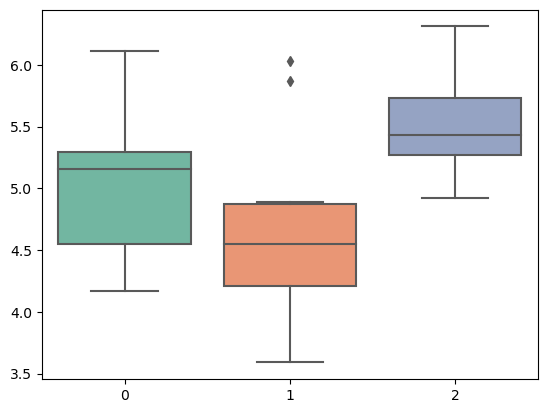

In [280]:
# create a boxplot to represent the data
# Link : https://seaborn.pydata.org/generated/seaborn.boxplot.html

sns.boxplot(data = [ctrl,trt1,trt2], palette=('Set2'))

> In this analysis of the boxlot, we observe distinctive patterns across the groups:

>> For the Ctrl group, the median bisects the interquartile to two ranges, representing the middle 50% of the dataset into two quartiles. The upper quartile spans from 5.1 to 5.3, while the lower quartile extends from 5.1 to 4.6. The distribution suggests a median data tendency around 5.2.

>> In the case of the Trt1 group, the median is closely aligned with the center of the box, indicating a balanced distribution within the IQR, with a median value approximately at 4.5. This visualization shows that there are only two measures extending beyond 4.9, reaching up to 5.8 and 6.0, respectively. Moreover, Ctrl1 records the monimum value observed in the dataset.

>> For the Trt2 group, the median is slightly lower within the box, signifiying that a majority of the data within the IQR is concentrated towards the lower end or Q1, primarly between 5.3 and 5.4.   
Outside the IQR, there are data points extending up to 6.2, marking the maximum value recorded in the dataset for the PlantGrowth dataset.  

Link: https://www.atlassian.com/data/charts/box-plot-complete-guide


## Performing the t-test

> The independent t-test, also called the two sample t-test, independent-samples t-test or student's t-test, is an inferential statistical test that determines whether there is a statistically significant difference between the means in two unrelated groups.

> The null hypothesis for the independent t-test is that the population means from the two unrelated groups are equal: $$H0: u1 = u2$$
> Most often, ourr objective is to demonstrate that the groups are different, that is, rejecting the $H0$ hypothesis: $$HA: u1 ≠ u2$$  
> To do this, we need to set a significance level (also called alpha) that allows us to either reject or accept the alternative hypothesis. Most commonly, this value is set at 0.05.  $$alpha=0.05$$
>  Alpha represents the probability of obtaining your results due to chance. The smaller this value is, the more “unusual” the results. Commonly, this value is set to .05 (or 5%), but can take on any value chosen by the research not exceeding .05.
> This test for homogeneity of variance provides an F-statistic and a significance value (p-value). If the pvalue is greater than 0.05 (i.e., p > .05), our group variances can be treated as equal and we can accept the $H0$ hypothesis. However, if p < 0.05, we have unequal variances and we have violated the assumption of homogeneity of variances.


> When attempting to perform the t-test, I realized that the DataFrames I had created were not in the correct format for the statistical function. To identify the type of data I was working with, I used $print(type("trt1"))$ and realized it was a $str$. After confirming the issue, I converted the DataFrames into arrays using NumPy to ensure compatibility with the t-test function.


Link:  
https://resources.nu.edu/statsresources/alphabeta#:~:text=Alpha%20is%20also%20known%20as,being%20compared%20to%2C%20for%20example.
https://statistics.laerd.com/statistical-guides/independent-t-test-statistical-guide.php

In [281]:


print(type("trt1"))

data1 = pd.DataFrame({"ctrl": [4.17, 5.58, 5.18, 6.11, 4.5, 4.61, 5.17, 4.53, 5.33, 5.14],"trt1": [4.81, 4.17, 4.41, 3.59, 5.87, 3.83, 6.03, 4.89, 4.32, 4.69],"trt2": [6.31, 5.12, 5.54, 5.5, 5.37, 5.29, 4.92, 6.15, 5.8, 5.26]}).to_numpy()
data1

ctrl = data1[:, 0]   # 1st column (index 0)
trt1 = data1[:, 1]   # 2nd column (index 1)
trt2 = data1[:, 2]   # 3rd column (index 2)



<class 'str'>


In [295]:
# Independent samples t-test on sample_a and sample_b
# Link: https://www.geeksforgeeks.org/how-to-conduct-a-two-sample-t-test-in-python/#:~:text=than%204%3A1.-,Performing%20Two%2DSample%20T%2DTest,Python3,-%23%20Python%20program%20to 
t_statistic, pvalue = stats.ttest_ind(ctrl,trt1)

alpha = 0.05
if pvalue < alpha:
    print(f"The pvalue equals {pvalue}. We reject the null hypothesis as there is a significant difference between the before and after.")
else:
    print(f"The pvalue equals {pvalue}. We fail to reject the null hypothesis as there is no significant difference between before and after.")

# Link: https://builtin.com/data-science/t-test-python 

The pvalue equals 0.2490231659730067. We fail to reject the null hypothesis as there is no significant difference between before and after.


> When comparing the $Ctrl$ sample with the $Trt1$, there is insufficient evidence to reject $H0$. If they would turn out to be different, it would be likely due to random chance. In the context of a t-test, it means the two groups being compared are not significantly different.

In [ ]:
# Independent samples t-test on sample_a and sample_b
t_statistic, pvalue = stats.ttest_ind(ctrl,trt2)

# Show
t_statistic, pvalue

alpha = 0.05
if pvalue < alpha:
    print(f"The pvalue equals {pvalue}. We reject the null hypothesis as there is a significant difference between the before and after.")
else:
    print(f"The pvalue equals {pvalue}. We fail to reject the null hypothesis as there is no significant difference between before and after.")

# Link: https://builtin.com/data-science/t-test-python 

The pvalue equals 0.04685138491157358. We reject the null hypothesis as there is a significant difference between the before and after.


> When comparing the $Ctrl$ sample with the $Trt2$, there is enough evidence to reject $H0$, at the 5% significance level. The difference between the two groups is statistically significant, meaning it is unlikely to be due to random chance.

In [297]:
# Independent samples t-test on sample_a and sample_b
t_statistic, pvalue = stats.ttest_ind(trt1,trt2)

# Show
t_statistic, pvalue

alpha = 0.05
if pvalue < alpha:
    print(f"The pvalue equals {pvalue}. We reject the null hypothesis as there is a significant difference between the before and after.")
else:
    print(f"The pvalue equals {pvalue}. We fail to reject the null hypothesis as there is no significant difference between before and after.")

# Link: https://builtin.com/data-science/t-test-python 

The pvalue equals 0.0075184261182198574. We reject the null hypothesis as there is a significant difference between the before and after.


> There is strong evidence against $H0$ when comparing the samples $Trt1$ and $Trt2$. The observed difference is highly unlikely to be due to random chance, which suggests a significant difference.